In [1]:
import torch
import torch.nn as nn
import utils as utils
from GrayModel import GrayModel
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak
import matplotlib.cm as cm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [2]:
trainset = utils.GrayDataset("data/data_xy/train_xy/data.csv", "data/data_xy/train_xy")
print("Total examples in trainset: ", len(trainset))

Total examples in trainset:  3653


In [3]:
testset = utils.GrayDataset("data/data_xy/test_xy/data.csv", "data/data_xy/test_xy")
print("Total examples in testset: ", len(testset))

Total examples in testset:  908


In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True, num_workers=4)

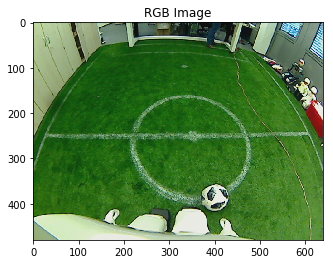

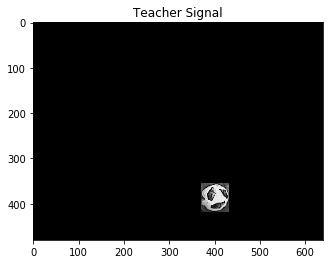

In [7]:
idx = 1600

image = trainset[idx]['image']
teacher = np.array(trainset[idx]['teacher'].squeeze())

plt.title("RGB Image")
plt.imshow(np.array(image).transpose(1, 2, 0))
plt.show()

plt.title("Teacher Signal")
plt.imshow(teacher, cmap="gray")
plt.show()

In [10]:
model = GrayModel()
model.load_state_dict(torch.load("pretrained_models/gray_epoch_10.model", map_location='cpu'))
model.to(device)

Model initialized


GrayModel(
  (conv_block1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_block2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (conv_block3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(

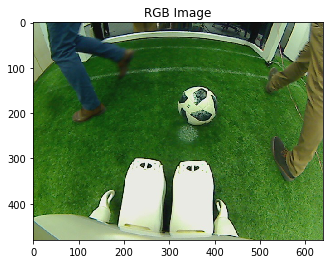

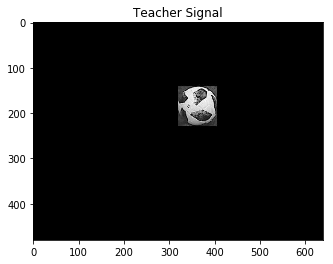

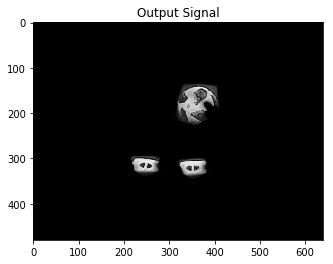

In [18]:
model.eval()
with torch.no_grad():
  idx = 900
  image = testset[idx]['image']
  signal = np.array(testset[idx]['teacher'].squeeze())
    
#   idx = 900
#   image = trainset[idx]['image']
#   signal = np.array(trainset[idx]['teacher'].squeeze())

  output = model(image.unsqueeze(0).float().to(device))
  output_signal = np.array(output.cpu().squeeze().detach())

  plt.title("RGB Image")
  plt.imshow(np.array(image).transpose(1, 2, 0))
  plt.show()

  plt.title("Teacher Signal")
  plt.imshow(signal, cmap="gray")
  plt.show()


  plt.title("Output Signal")
  plt.imshow(output_signal, cmap="gray")
  plt.show()